In [12]:
import numpy
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
df= pd.read_csv("/content/gdrive/MyDrive/ml_svm_dataset/Frogs_MFCCs.csv")


In [35]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [36]:
index = []
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].astype('category').cat.codes
    index.append(i)

# scaler = MinMaxScaler()
# scaler.fit(df)
# df[index] = scaler.fit_transform(df[index])

In [37]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,3,0,0,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,3,0,0,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,3,0,0,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,3,0,0,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,3,0,0,1


In [47]:
clf=svm.SVC(kernel='linear' , random_state=0)
# y=df["RecordID"]
# X=pd.DataFrame(np.array(df)[:,:25])
X = df.drop(['Family', 'RecordID'],axis=1)
y = df['Family'] 
print(y)
print(X)

0       3
1       3
2       3
3       3
4       3
       ..
7190    2
7191    2
7192    2
7193    2
7194    2
Name: Family, Length: 7195, dtype: int8
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.08

In [48]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# df[index] = scaler.fit_transform(df[index])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

fit 

In [52]:
y_train

1940    3
3210    3
3731    3
968     1
6760    3
       ..
5920    2
8       3
5226    2
5207    2
4206    3
Name: Family, Length: 5036, dtype: int8

In [53]:
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_pred = clf.predict(x_test)

In [59]:
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [60]:
from sklearn import metrics
print("accuracy of our data")

print(metrics.accuracy_score(y_pred,y_test))

accuracy of our data
0.9763779527559056


In [65]:
print (np.array(clf.support_vectors_).shape)

(538, 24)


soft


In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

accuracy of our data
0.6322371468272349
accuracy of our data
0.6095414543770264
accuracy of our data
0.8337193144974525
accuracy of our data
0.8327929597035665
accuracy of our data
0.9124594719777674
accuracy of our data
0.9916628068550255
accuracy of our data
0.9967577582213988
accuracy of our data
0.9972209356183418
accuracy of our data
0.9976841130152848
accuracy of our data
0.9976841130152848
accuracy of our data
0.9976841130152848
accuracy of our data
0.9976841130152848


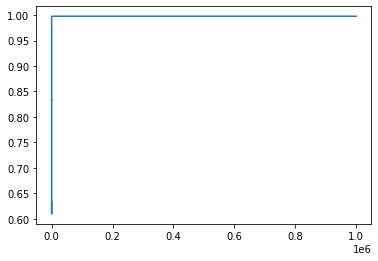

In [77]:
c_range = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000,1000000]
acc = []
accuracy_lst=[]
for i in c_range:

    Nl_cl = svm.SVC(kernel='poly',C=i)
    Nl_cl.fit(x_train, y_train)
    y_pred_train = Nl_cl.predict(x_train)
    y_pred = Nl_cl.predict(x_test)
    print("accuracy of our data")

    print(metrics.accuracy_score(y_pred,y_test))
    accuracy_lst.append(metrics.accuracy_score(y_pred,y_test))
plt.plot(c_range,accuracy_lst)


In [78]:
print(f"number of support vectors = {Nl_cl.support_vectors_.shape[0]}")
Nl_cl.support_vectors_

number of support vectors = 95


array([[ 0.36045076,  0.48293102,  1.        , ..., -0.07715283,
         6.        ,  8.        ],
       [ 1.        ,  0.32268183,  0.36859815, ..., -0.01647522,
         6.        ,  8.        ],
       [ 0.14885041,  1.        ,  0.3164251 , ...,  0.07720783,
         6.        ,  8.        ],
       ...,
       [ 1.        , -0.04476663, -0.29656002, ..., -0.11755964,
         4.        ,  6.        ],
       [ 1.        , -0.08767208,  0.15709696, ...,  0.25516994,
         0.        ,  1.        ],
       [ 1.        ,  0.05943123,  0.08511289, ...,  0.10215318,
         0.        ,  1.        ]])

In [80]:
Classifier=svm.SVC(kernel='rbf',C=1000)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

print("accuracy of our data")

print(metrics.accuracy_score(y_pred,y_test))


accuracy of our data
1.0


In [81]:
Classifier=svm.SVC(kernel='poly',C=1000)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

print("accuracy of our data")

print(metrics.accuracy_score(y_pred,y_test))


accuracy of our data
0.9976841130152848


accuracy of our data
0.6100046317739695
accuracy of our data
0.6100046317739695
accuracy of our data
0.8814265863825845
accuracy of our data
0.9328392774432608
accuracy of our data
0.9777674849467346
accuracy of our data
1.0
accuracy of our data
1.0
accuracy of our data
1.0
accuracy of our data
1.0
accuracy of our data
1.0


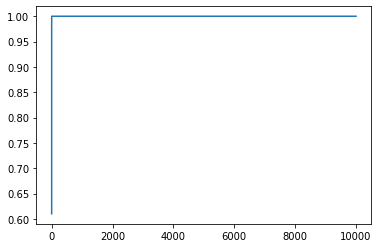

In [85]:
c_range = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
acc = []
accuracy_lst=[]
for i in c_range:
    Classifier=svm.SVC(kernel='rbf',C=i)
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)

    print("accuracy of our data")

    print(metrics.accuracy_score(y_pred,y_test))
    
    accuracy_lst.append(metrics.accuracy_score(y_pred,y_test))
plt.plot(c_range,accuracy_lst)

In [87]:
from sklearn.model_selection import cross_val_score, KFold

Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


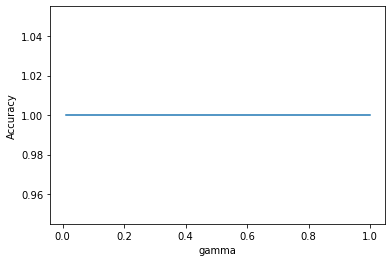

In [90]:
accuracy = []
gamma_range = np.linspace(0.01, 1, 10)
for g in gamma_range:
    model = svm.SVC(kernel='rbf' , C=1000 , gamma=g)
    model.fit(x_train, y_train)   

    y_pred = Classifier.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_pred,y_test))
print(f'Accuracy: {accuracy}') 
plt.plot(gamma_range,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.show()


In [92]:
best_classifier = svm.SVC(kernel='rbf' , C=1000 , gamma=0.01)
best_classifier.fit(x_train, y_train)
y_pred_train = best_classifier.predict(x_train)
y_pred = best_classifier.predict(x_test)

In [95]:
kf = KFold(n_splits=4, shuffle=True)
score = cross_val_score(best_classifier, x_train, y_train, cv=kf)
print(np.mean(score))

0.9992057188244639
